<a href="https://colab.research.google.com/github/ehsanh123/web_app/blob/main/Gantt_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

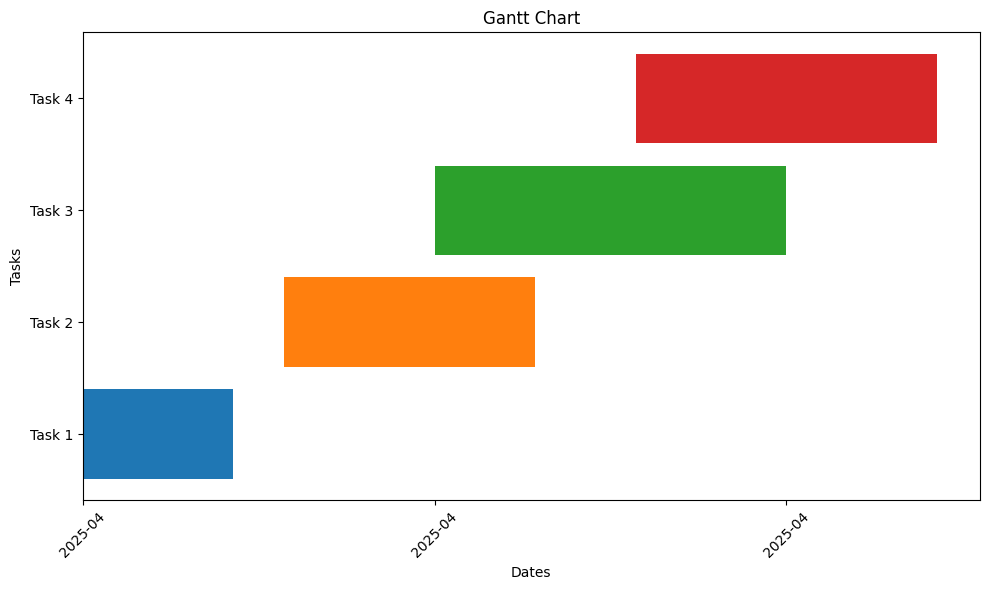

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Sample data for tasks and their durations
tasks = ['Task 1', 'Task 2', 'Task 3', 'Task 4']
start_dates = ['2025-04-01', '2025-04-05', '2025-04-08', '2025-04-12']
end_dates = ['2025-04-04', '2025-04-10', '2025-04-15', '2025-04-18']

# Convert string dates to datetime format
start_dates = pd.to_datetime(start_dates)
end_dates = pd.to_datetime(end_dates)

# Create a DataFrame
df = pd.DataFrame({
    'Task': tasks,
    'Start': start_dates,
    'End': end_dates,
})

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through the tasks and plot them
for i, task in enumerate(df['Task']):
    ax.barh(task, (df['End'][i] - df['Start'][i]).days, left=df['Start'][i])

# Format the x-axis with date formatting
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Dates')
plt.ylabel('Tasks')
plt.title('Gantt Chart')

# Display the plot
plt.tight_layout()
plt.show()


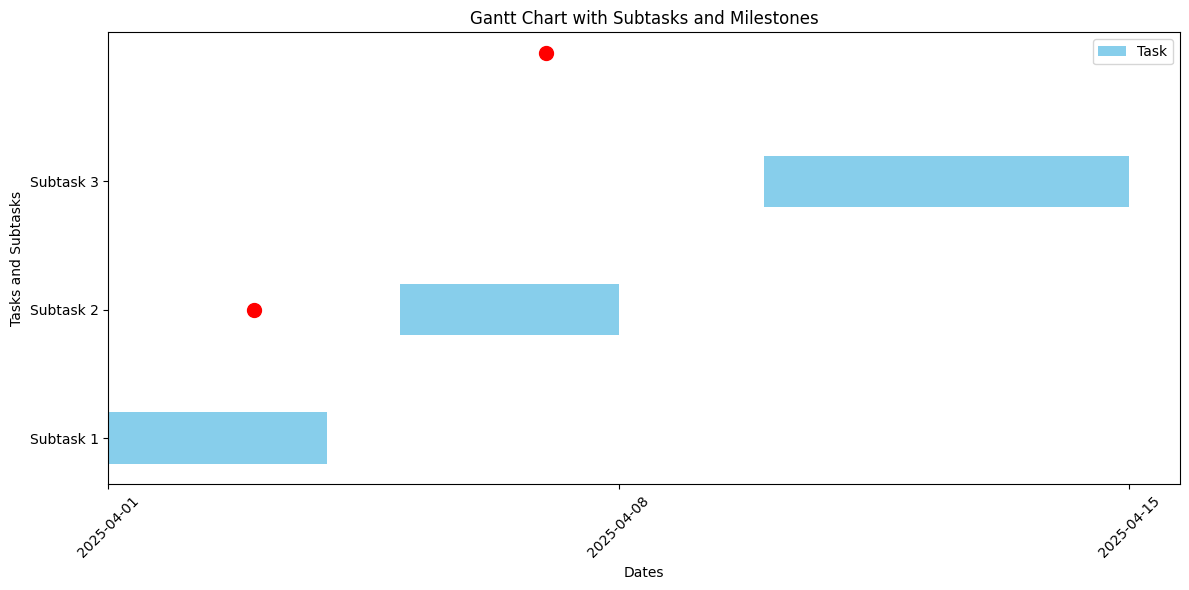

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Sample data for tasks, subtasks, and milestones
tasks = ['Task 1', 'Task 1', 'Task 2', 'Task 2', 'Task 3']
subtasks = ['Subtask 1', 'Milestone 1', 'Subtask 2', 'Milestone 2', 'Subtask 3']
start_dates = ['2025-04-01', '2025-04-03', '2025-04-05', '2025-04-07', '2025-04-10']
end_dates = ['2025-04-04', '2025-04-03', '2025-04-08', '2025-04-07', '2025-04-15']

# Convert string dates to datetime format
start_dates = pd.to_datetime(start_dates)
end_dates = pd.to_datetime(end_dates)

# Create a DataFrame
df = pd.DataFrame({
    'Task': tasks,
    'Subtask': subtasks,
    'Start': start_dates,
    'End': end_dates,
})

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate through the tasks and plot them
for i, row in df.iterrows():
    if row['Subtask'].startswith('Milestone'):
        # Mark milestones with a small point
        ax.plot(row['Start'], i, marker='o', markersize=10, color='red', label='Milestone' if i == 0 else "")
    else:
        # Plot regular tasks and subtasks as bars
        ax.barh(row['Subtask'], (row['End'] - row['Start']).days, left=row['Start'], height=0.4, color='skyblue', label='Task' if i == 0 else "")

# Format the x-axis with date formatting
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Dates')
plt.ylabel('Tasks and Subtasks')
plt.title('Gantt Chart with Subtasks and Milestones')

# Handle the legend to avoid duplicate labels
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Display the plot
plt.tight_layout()
plt.show()
